# Pytorch

In [1]:
!pip install torch

  Using cached torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl (750.6 MB)
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    torch from https://files.pythonhosted.org/packages/f8/04/ebf936e02d37c185341558de73324c6511d7fb7578cb1c3439411475fd7e/torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl#sha256=58c7814502b1c129a650d7092033bbb0bbd64faf1a7941631aaa1aeaddc37570:
        Expected sha256 58c7814502b1c129a650d7092033bbb0bbd64faf1a7941631aaa1aeaddc37570
             Got        e3a49f7ce79a548ba12021287cfe4490c1af2397fd9737b658bf416afea36943



In [4]:
!pip3 install torch==1.11.0+cpu torchvision==0.12.0+cpu torchaudio==0.11.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |████████████████████████████████| 169.2 MB 4.1 kB/s eta 0:00:01    |███▋                            | 19.2 MB 769 kB/s eta 0:03:15
     |████████████████████████████████| 14.7 MB 22 kB/s  eta 0:00:01
     |████████████████████████████████| 2.7 MB 657 kB/s eta 0:00:01


In [5]:
import torch

In [7]:
torch.tensor([1,2,3]) # creating a tensor

tensor([1, 2, 3])

In [8]:
_ * 2

tensor([2, 4, 6])

In [11]:
x = torch.randn(1,10)
prev_h = torch.randn(1,20)

W_h = torch.randn(20,20)
W_x = torch.randn(20,10)
W_h.requires_grad = True
W_x.requires_grad = True

i2h = torch.mm(W_x,x.t())
h2h = torch.mm(W_h,prev_h.t())

next_h = i2h + h2h
next_h - next_h.tanh()

next_h.backward(torch.ones(20,1))

In [ ]:
# 



# BagOfWords

# WordEmbeddings

# Feed Forward Neural Network 

# RNN with LSTM GRU

# Feed Forward Neural Network 

# RNN LSTM GRU

# Stacking 

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [3]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
# remove redundant features from x variables 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  stratify=y, # ratio between pos , neg classes will be maintained
                                                  test_size=0.2,
                                                  random_state=42)


In [6]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [7]:
#classification models building : 

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [10]:
#KNN : K nearest neighbors 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # 3 classes
knn.fit(X_train,y_train)

#make predictions 
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


#Train set performance 
knn_train_accuracy = accuracy_score(y_train,y_train_pred)
knn_train_mcc = matthews_corrcoef(y_train,y_train_pred)
knn_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
knn_test_accuracy = accuracy_score(y_test,y_test_pred)
knn_test_mcc = matthews_corrcoef(y_test,y_test_pred)
knn_test_f1 = f1_score(y_test,y_test_pred,average="weighted")


#knn train accuracies : 
print("KNN : train accuracies")
print ("accuracy %s" % knn_train_accuracy)
print("matthews corr coef : %s" %knn_train_mcc)
print("f1 score : %s" %knn_train_f1)

#knn test accuracies:
print("KNN : test accuracies")
print ("accuracy %s" % knn_test_accuracy)
print("matthews corr coef : %s" %knn_test_mcc)
print("f1 score : %s" %knn_test_f1)


KNN : train accuracies
accuracy 0.9583333333333334
matthews corr coef : 0.9375976715114386
f1 score : 0.9583268218992551
KNN : test accuracies
accuracy 1.0
matthews corr coef : 1.0
f1 score : 1.0


In [12]:
# predictions are classes : 
print(y_train_pred)
print(y_test_pred)

[0 1 1 0 1 2 1 1 2 2 2 1 1 1 1 0 0 2 2 0 2 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 2 1 2 1 1 2 0 0 0 1
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [13]:
# svm radial basis kernel function ) 

from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf = svm_rbf.fit(X_train,y_train)

#make predictions : 
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

#training set performance
#Train set performance 
svm_rbf_train_accuracy = accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#svm rbf train accuracies : 
print("svm_rbf : train accuracies")
print ("accuracy %s" % svm_rbf_train_accuracy)
print("matthews corr coef : %s" %svm_rbf_train_mcc)
print("f1 score : %s" %svm_rbf_train_f1)

#svm rbf test accuracies:
print("svm_rbf : test accuracies")
print ("accuracy %s" % svm_rbf_test_accuracy)
print("matthews corr coef : %s" %svm_rbf_test_mcc)
print("f1 score : %s" %svm_rbf_test_f1)




svm_rbf : train accuracies
accuracy 0.9916666666666667
matthews corr coef : 0.9876028806587153
f1 score : 0.9916653643798509
svm_rbf : test accuracies
accuracy 0.9666666666666667
matthews corr coef : 0.9515873026942034
f1 score : 0.9665831244778613


In [17]:
# stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # meta lerner



estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf)
]

#build stack model 
stack_model = StackingClassifier(
    estimators = estimator_list, final_estimator = LogisticRegression()
)

#train stacked model 
stack_model.fit(X_train,y_train)

#make predictions
y_train_pred = stack_model.predict(X_train)
y_tess_pred = stack_model.predict(X_test)

#training set model performance
#Train set performance 
stack_model_train_accuracy = accuracy_score(y_train,y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train,y_train_pred)
stack_model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
stack_model_test_accuracy = accuracy_score(y_test,y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#svm rbf train accuracies : 
print("stack_model : train accuracies")
print ("accuracy %s" % stack_model_train_accuracy)
print("matthews corr coef : %s" %stack_model_train_mcc)
print("f1 score : %s" %stack_model_train_f1)

#svm rbf test accuracies:
print("stack_model : test accuracies")
print ("accuracy %s" % stack_model_test_accuracy)
print("matthews corr coef : %s" %stack_model_test_mcc)
print("f1 score : %s" %stack_model_test_f1)

stack_model : train accuracies
accuracy 0.9916666666666667
matthews corr coef : 0.9876028806587153
f1 score : 0.9916653643798509
stack_model : test accuracies
accuracy 0.9666666666666667
matthews corr coef : 0.9515873026942034
f1 score : 0.9665831244778613


In [19]:
acc_train_list = {
    'knn': knn_train_accuracy,
    'svm_rbf':svm_rbf_train_accuracy,
    'stack':stack_model_train_accuracy
}
acc_train_list

{'knn': 0.9583333333333334,
 'svm_rbf': 0.9916666666666667,
 'stack': 0.9916666666666667}

In [21]:
mcc_train_list = {
    'knn':knn_train_mcc,
    'svm_rbf':svm_rbf_train_mcc,
    'stack':stack_model_train_mcc
}
mcc_train_list

{'knn': 0.9375976715114386,
 'svm_rbf': 0.9876028806587153,
 'stack': 0.9876028806587153}

In [22]:
f1_train_list = {
    'knn':knn_train_f1,
    'svm_rbf':svm_rbf_train_f1,
    'stack':stack_model_train_f1    
}
f1_train_list

{'knn': 0.9583268218992551,
 'svm_rbf': 0.9916653643798509,
 'stack': 0.9916653643798509}

In [23]:
acc_df = pd.DataFrame.from_dict(acc_train_list,orient="index",columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list,orient="index",columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list,orient="index",columns=['F1'])
stack_df = pd.concat([acc_df,mcc_df,f1_df],axis = 1)
stack_df

,Accuracy,MCC,F1
knn,0.958333,0.937598,0.958327
svm_rbf,0.991667,0.987603,0.991665
stack,0.991667,0.987603,0.991665


In [24]:
stack_df.to_csv('stack_results.csv')

In [ ]:
# import tweet data
# preprocess it 
# svm 
# nb model 
# feed forward
# rnn
# lstm
# gru
# stacked model 
# compare all 
# show results graphically 

# Bagging , Boosting ,  Voting

## voting
- http://localhost:8888/notebooks/Downloads/voting-ensemle-main/voting-classifier-iris.ipynb 

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
voting_X , voting_y = load_iris(return_X_y = True)
v_X =pd.DataFrame(voting_X)
v_X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
v_y=pd.DataFrame(voting_y)
v_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
v_df = pd.concat([v_X,v_y],axis=1)
v_df = v_df.set_axis(["0","1","2","3","4"],axis=1)
v_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


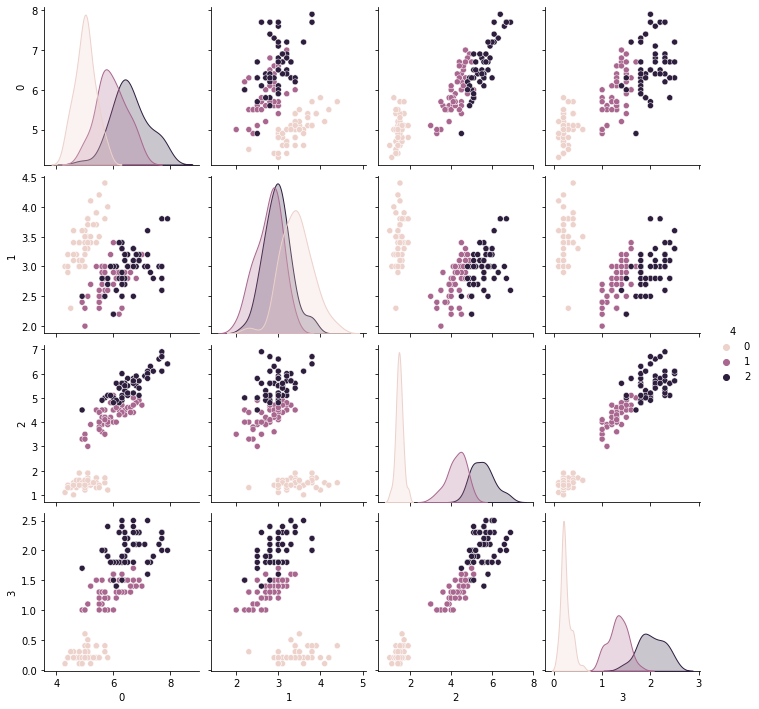

In [6]:
import seaborn as sns
sns.pairplot(v_df,hue='4')

# From RPS for publish2

# For submission 

# 0. Models 
0. Preprocessing + Dataset(generic for training)
- BoW (TFIDF)
- Word Embedding
1. Naive Bayes
2. SVM 
3. Feed Forward 
4. RNN , LSTM , GRU

# 1. Stacking of Models
- meta learner  : Logistic regression model 


# 2. Voting of Models

# 3. Bagging of Models

# 4. Boosting of Models 

# 5. Testing on Actual Data from the Application